# k-Means Clustering

Do $k$-Means Clustering using a different distance metric.



In [35]:
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from collections import defaultdict

all_data = np.loadtxt("f150_motor_distributors.txt", delimiter=",")

File ‘f150_motor_distributors.txt’ already there; not retrieving.



In [36]:
def mahalanobis_dist(u, v, relation):
  return np.dot(np.dot((u - v).T, np.linalg.inv(np.dot(relation.T, relation))), (u - v))

def kmeans_cluster(data,
                   centroids = np.random.randn(2,5),
                   P = np.eye(2),
                   num_iterations = 100):
  centroids = data.T[:, :5].T
  classes = np.random.choice(5, len(data))

  for _ in range(num_iterations):
    distances_to_centroids = pairwise_distances(data, centroids, metric='euclidean')
    cluster_assignment = np.argmin(distances_to_centroids, axis = 1)
    new_centroids = np.array([data[cluster_assignment == i].mean(axis = 0) for i in range(5)])

    if np.all(centroids == new_centroids):
      break

    centroids = new_centroids

  return centroids, classes

def kmeans_cluster_with_mahalanobis_dista(data,
                                          centroids = np.random.randn(2,5),
                                          P = np.eye(2),
                                          num_iterations = 100):
  centroids = data.T[:, :5].T
  classes = np.random.choice(5, len(data))

  for _ in range(num_iterations):
    cluster_assignment = np.array([np.argmin([mahalanobis_dist(d, c, P_) for c in centroids]) for d in data])
    new_centroids = np.array([data[cluster_assignment == i].mean(axis=0) for i in range(5)])

    if np.all(centroids == new_centroids):
      break

    centroids = new_centroids

  return centroids, classes

def plot_data(data, centroids, classes):
  plt.scatter(data[:, 0], data[:, 1], s=classes)
  plt.scatter(centroids[:, 0], centroids[:, 1], s=100, alpha=0.5)
  plt.show()
  return



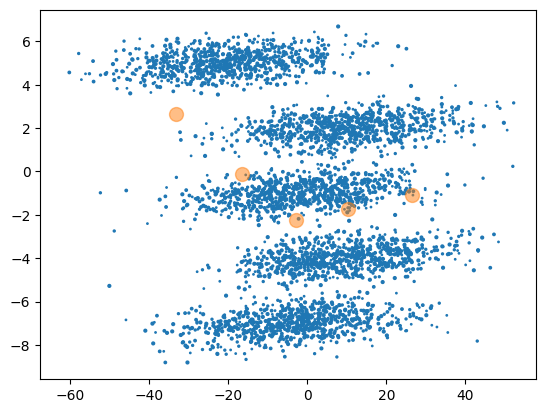

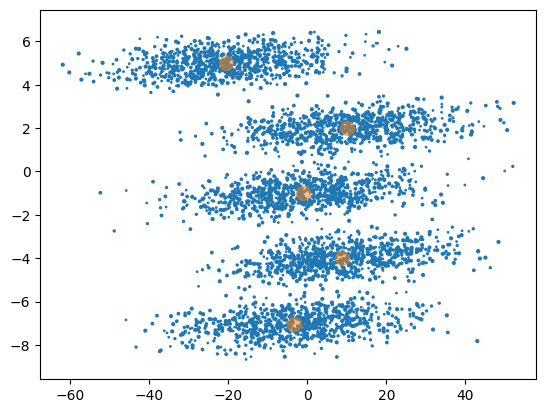

In [37]:
use_P = True #@param
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])

centroids_, classes_ = kmeans_cluster( all_data, centroids_, P = P_ )
plot_data(all_data, centroids_, classes_)

new_centroids_, new_classes_ = kmeans_cluster_with_mahalanobis_dista( all_data, centroids_, P = P_ )
plot_data(all_data, new_centroids_, new_classes_)


In [38]:
def first_principle_component(data):
  # standardize the data
  standardized_data = (data - np.mean(data, axis=1, keepdims=True)) / np.std(data, axis=1, keepdims=True)

  # calculate the covariance matrix
  cov_matrix = np.cov(standardized_data)

  # calculate the eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # sort the eigenvalues and eigenvectors
  sorted_indices = np.argsort(eigenvalues)[::-1]
  sorted_eigenvalues = eigenvalues[sorted_indices]
  sorted_eigenvectors = eigenvectors[:, sorted_indices]

  return sorted_eigenvectors[:, 0]


In [27]:
FPC_all_data = first_principle_component(all_data)
print("First Principle Component for the dataset is: ", FPC_all_data)


First Principle Component for the dataset is:  [ 0.01414214+0.j  0.01414214+0.j  0.01414214+0.j ... -0.01414214+0.j
  0.01414214+0.j  0.01414214+0.j]


In [34]:
data_size = new_classes_.size
index_map = defaultdict(list)
for idx in range(data_size):
  index_map[new_classes_[idx]].append(idx)

FPC_clustered = []
for idx in range(5):
  FPC = first_principle_component(all_data[index_map[idx]])
  FPC_clustered.append(FPC)
  print(f"First Principle Component for {idx}'s clustered data is: {FPC}")

# are they all the same?
all_same = all(np.array_equal(FPC_clustered[0], n) for n in FPC_clustered)
print("First Principle Components of each cluster are the same: ", all_same)

First Principle Component for 0's clustered data is: [-0.0316386+0.j  0.0316386+0.j  0.0316386+0.j -0.0316386+0.j
 -0.0316386+0.j  0.0316386+0.j  0.0316386+0.j -0.0316386+0.j
  0.0316386+0.j -0.0316386+0.j  0.0316386+0.j  0.0316386+0.j
  0.0316386+0.j  0.0316386+0.j  0.0316386+0.j  0.0316386+0.j
  0.0316386+0.j -0.0316386+0.j  0.0316386+0.j  0.0316386+0.j
 -0.0316386+0.j  0.0316386+0.j -0.0316386+0.j  0.0316386+0.j
  0.0316386+0.j  0.0316386+0.j -0.0316386+0.j  0.0316386+0.j
 -0.0316386+0.j  0.0316386+0.j -0.0316386+0.j -0.0316386+0.j
  0.0316386+0.j  0.0316386+0.j -0.0316386+0.j -0.0316386+0.j
  0.0316386+0.j -0.0316386+0.j  0.0316386+0.j  0.0316386+0.j
  0.0316386+0.j -0.0316386+0.j  0.0316386+0.j -0.0316386+0.j
 -0.0316386+0.j  0.0316386+0.j  0.0316386+0.j -0.0316386+0.j
 -0.0316386+0.j -0.0316386+0.j -0.0316386+0.j -0.0316386+0.j
 -0.0316386+0.j  0.0316386+0.j  0.0316386+0.j  0.0316386+0.j
 -0.0316386+0.j -0.0316386+0.j -0.0316386+0.j -0.0316386+0.j
  0.0316386+0.j -0.0316386+0.j -